In [53]:
import numpy as np
import matplotlib.pyplot as plt

#### Example Dataset (AGE, SMOKING, GENDER AND LUNG DESEASE)


In [54]:
data = np.array([
    [25, 0, 0, 0],
    [30, 1, 1, 0],
    [45, 1, 1, 1],
    [50, 1, 0, 1],
    [35, 0, 1, 0],
    [55, 1, 1, 1],
    [60, 1, 0, 1],
    [40, 0, 1, 0],
    [65, 1, 1, 1],
    [70, 0, 0, 1]
])

# extract feature and labels. Separate target and variables
x = data[:, :-1]
y = data[:, -1]
# print(f'Extracted data {x} and {y}')

# standardize the AGE feature (first column)
x[:, 0] = (x[:, 0] - np.mean(x[:, 0])) / np.std(x[:, 0])
x = np.hstack([np.ones((x.shape[0], 1)), x])

# Initialize weights (including bias)
weights = np.zeros(x.shape[1])


#### STEP 1: Calculate Singmoid Function


In [55]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### STEP 2: Calculate Cost Function


In [56]:
def compute_cost(x, y, weights):
    m = len(y)
    z = np.dot(x, weights)
    predictions = sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

### STEP 3: Calculate Gradient Descent


In [57]:
def gradient_descent(x, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        z = np.dot(x, weights)
        predictions = sigmoid(z)
        
        # Calculate gradients
        gradient = (1/m) * np.dot(x.T, (predictions - y))
        
        # Update weights
        weights -= learning_rate * gradient
        
        # Save the cost in cost history
        cost_history[i] = compute_cost(x, y, weights)
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f'Cost at iteration {i}: {cost_history[i]}')
    
    return weights, cost_history
# Set learning rate and number of iterations
learning_rate = 0.1
iterations = 1000

# Train the model
weights, cost_history = gradient_descent(x, y, weights, learning_rate, iterations)

# Print the final weights
print("Trained weights:", weights)

Cost at iteration 0: 0.6842396751751978
Cost at iteration 100: 0.3343436168255789
Cost at iteration 200: 0.22461178435257848
Cost at iteration 300: 0.17025347228108584
Cost at iteration 400: 0.13772495284128214
Cost at iteration 500: 0.11599779101705043
Cost at iteration 600: 0.10040914808360286
Cost at iteration 700: 0.08864997578329276
Cost at iteration 800: 0.07944527249378475
Cost at iteration 900: 0.072032615131371
Trained weights: [-0.22901102  4.08069219  4.18023079 -1.95912475]


#### STEP 4: MAKE PREDICTIONS


In [58]:
# Predict function
def predict(x, weights):
    z = np.dot(x, weights)
    return sigmoid(z) >= 0.5

# Make predictions on the training set
predictions = predict(x, weights)
print("Predictions:", predictions)
print("Actual values:", y)

Predictions: [False False  True  True False  True  True False  True  True]
Actual values: [0 0 1 1 0 1 1 0 1 1]


#### STEP 4: VISUALIZE MODEL


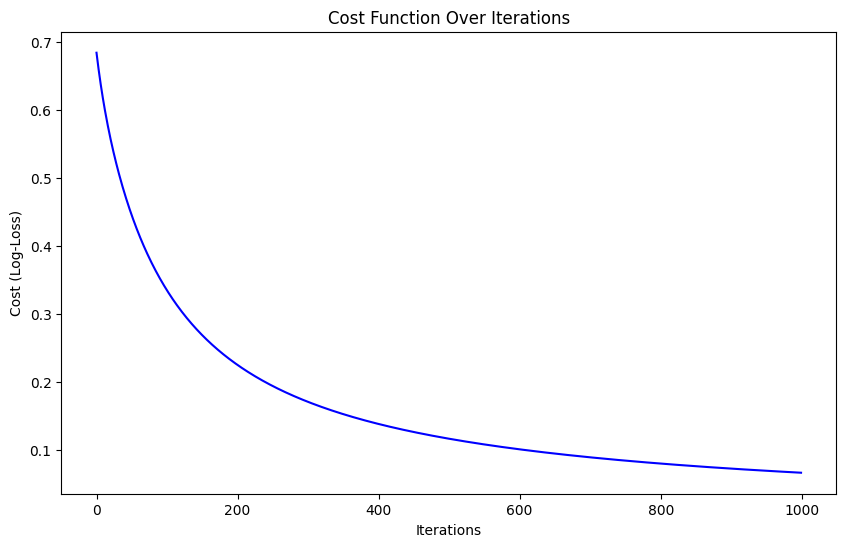

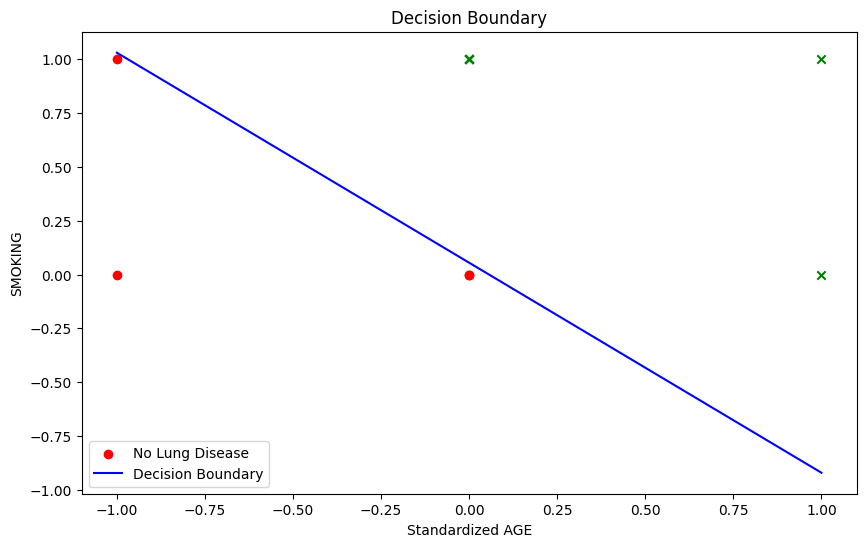

In [59]:
# Plot the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title("Cost Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (Log-Loss)")
plt.show()

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Plot the data points
for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(x[i, 1], x[i, 2], color='red', marker='o', label='No Lung Disease' if i == 0 else "")
    else:
        plt.scatter(x[i, 1], x[i, 2], color='green', marker='x', label='Lung Disease' if i == 0 else "")

# Plot decision boundary (assuming GENDER=0 for simplicity)
x_values = np.linspace(min(x[:, 1]), max(x[:, 1]), 100)
decision_boundary = -(weights[0] + weights[1] * x_values + weights[3] * 0) / weights[2]
plt.plot(x_values, decision_boundary, color='blue', label='Decision Boundary')

plt.title("Decision Boundary")
plt.xlabel("Standardized AGE")
plt.ylabel("SMOKING")
plt.legend()
plt.show()